<a href="https://colab.research.google.com/github/camilavejar/COMP432-Machine-Learning-Project-Emotional-Summaries/blob/main/Project_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Emotional Summaries**

## **Abstract**
   <!-- Abstract here. Give an executive summary of your project: goal, methods, results, conclusions. Usually no more than 200 words. -->

The goal of this project is to build a model capable of providing emotion-based summaries of texts. Traditional summarization models are fact-based and do not provide the extra context that emotion-loaded sentences bring. In this project, we will be using a summarization models such as PEGASUS and T5 and add a layer of emotion by fine-tuning these models on an emotional dataset. We will be using a small custom CNN daily mail dataset made emotional through preprocessing. As for the performance metrics, we will use the ROUGE, BLEU and BERT scoring to ensure that good and coherent summarization is being produced. Lastly, the main challenges include the creation of an emotional dataset and the ability of the models to learn emotion, we want to be able to catch the emotions from the text and not impact the summarization quality. Another challenge is computational resources since transformer models, especially PEGASUS, are known to be very heavy.

## **Introduction**

<!-- Here you have to explain the problem that you are solving. Explain why it is important, and what are the main challenges. Mention previous attempts (add papers as references) to solve it. Mainly focus on the techniques closely related to our approach. Briefly describe your approach and explain why it is promising for solving the addressed problem. Mention the dataset and the main results achieved.

In this section, you can add **text** and **figures**. -->


Summarization is a very powerful tool, as it allows us to ingest a large amount of data in just a few sentences. However, most of the summarization tools available today are based on being factual.This means that we can only produce  objective summaries and possibly miss all the context and undertones that emotions brings in. By including emotion in the summarizing of a text, we can provide a more context-rich and complete summary to users. For example, if we use a traditional summarization model to process a news article, we will get only the facts. If we incorporate emotion detection, we can learn about any biases the reporter has, ie we are able to tell if the news article is trying to make us feel a certain way about the contents. This brings more power to the users, as they should be aware and not manipulated by what they read.


### Main challenges
The main challenges about this issue revolve around the emotion integration into the summaries, the lack of readily available datasets and the computational resources needed. There exists several summarization models like PEGASUS and T5, both transformers capable of summarizing a text input objectively.


> PEGASUS (Pre-training with Extracted Gap-sentences for Abstractive Summarization)

*   This model is transformer based and made for abstractive summaries.
*   This model is innovative in the fact that it is capable of predict any missing sentences in a summary.
*   Trained on CNN/DailyNews dataset

> T5 (Text-to-Text Transfer Transformer)

*   Thia model is transformer based and made for various tasks such as summarixation, translation, classification, etc. It is not focused on generating summaries.
*   Less computationally expensive than PEGASUS. Takes in and outputs a smaller amount of tokens.

(Other models such as BART, are also used in summarization tasks but we will be focusing on PEGASUS and T5)

Despite the existence of various models capable of producing summaries, the integration of emotion isn't as common or as widely available. It is difficult for models to understand and then reproduce emotion into words. Most of the exisitng works connecitng emotion to summaries focus on emotion detection instead of emotion integration.

As for the dataset availability, the ones available are either article-summary datasets, like the CNN/Daily Mail dataset or emotion label-text datatsets, like the GoEmotions dataset. Our summarization models needs to have something to summarize as well as the goal summary which is why the mentioned dataset is commonly used for summarization purposes. On the other hand the GoEmotions dataset has emotional texts with labels but no goal summary. This means that for this project, we will be needing a custom dataset in the format of article-emotional goal summary OR emotion labeled articles-goal summaries.

As for computational resources, since these are transformer models we cannot fully train them. This means that we can use techniques such as partially freezing the models to only fine tune the decoder layers reduce resource usage. Even with this precaution, the usage of a fast GPU is necessary to reduce training time of 1 epoch from 30 minutes to 10 minutes.

### My Approach
This first version of this project involved using an emotion classifer, train it and label the summary dataset. This would've meant that the model would've learned by inference. However, the summaries were still objective and that was not going to bring any good results since this is not a labelling task. That is why we decided to take chunk of the dataset and pass it through a model like chat gpt and modify that dataset to contain emotional summaries. With this, we don't need to have the labeled dataset anymore since training the summarizing model on emotional summaries will be far more efficient.

After getting the data necessary, we can go ahead and tokenize the inputs and then fine tune our models. This will be done by training pretrained versions of the models with our dataset while also fine tuning various hyper parameters to observe results.

after getting data == tokenize and pass through model
freeze part of it - set up trianing argument and train

The dataset used was a custom version of the CNN/Daily news dataset. This dataset has around 300k article-summary samples. In our custom set, we have 5k entries for training, 500 for validation and 1k for testing.

The results of this project are the fine-tuned PEGASUS model version 3 (pegasus_emotional_summariesV3). A fine tuned PEGASUS model that can generate an emotional summary out of a long text.

SAMPLE:
```
Generated Summary:

 It's heartbreaking to hear that a woman donates one of her kidneys to a stranger. Many are shaken by the revelation that genetic data is used to match donors with recipients. It's heartbreaking to hear that the chain of surgeries is to be wrapped up Friday.

Objective Summary (ORIGINAL):

Zully Broussard decided to give a kidney to a stranger. A new computer program helped her donation spur transplants for six kidney patients.

```

## **Methodology**
<!-- Describe the important steps you took to achieve your goal. Focus more on the most important steps (preprocessing, extra features, model aspects) that turned out to be important. Mention the original aspects of the project and state how they relate to existing work.

In this section, you can add **text** and **figures**. For instance, it is strongly suggested to add a picture of the best machine learning model that you implemented to solve your problem (and describe it).
 -->

### Preprocessing
To build the emotional custom dataset, we started by randomly selecting 6,500 samples from the CNN/DailyMail dataset (Section 1.1 of EmotionalSummariesProject notebook) . The goal was to transform the objective summaries into emotional ones to be able to capture extra context within the articles. We used ChatGPT to rewrite the summaries with an emotional tone. However, processing all 6.5k entries at once was too large for a single ChatGPT session, so we had to split the data into two batches of 5k and 1.5k samples. After that initial processing, the emotional summaries were saved as JSON files, which were then downloaded and loaded into the EmotionalSummariesProject notebook. The datasets are available in the project's repository and have to be placed into the EmotionalSummariesProject notebook to reproduce results.

Once the emotional data was loaded, it had to be tokenized for the model's input (Both PEGASUS and T5). We had to use two different tokenizers,PegasusTokenizer and T5Tokenizer, depending on the model. It is important to have separate tokenizers because each is made for its respective model architecture. PEGASUS uses a unique tokenization strategy optimized for summarization tasks, while T5's uses a more general-purpose tokenizer.

### Model Set Up and Training

We began the project with the PEGASUS-XSum model, because it was smaller. In theory it would have made it more feasible to train using a T4 GPU on Colab. After loading the model, we partially froze some of its layers to reduce the number of trainable parameters and reduce computational resources usage. However, training still took around 1.5 hours for 3 epochs, which was inefficient and not a viable option. In the first few hours, we had exhausted all the free resources. Because of that, we had to give up on this model and consider other options.

We then switched to PEGASUS-CNN/DailyMail, a model pre-trained on the same dataset we were fine-tuning. We also gained access to the A100 GPU woth Colab Pro. Similar to the previous model, we partially froze the model to reduce GPU usage because even with stronger GPUs, the model is very large if we were to train it in its entirety. We trained this model over four iterations, adjusting hyperparameters between each run. For example, after increasing the number of epochs from 3 to 5 (between versions 1 and 2), we observed that the validation loss was beginning to plateau which is why we lowered the learning rate and introduced a linear learning rate scheduler. The scheduler was able to gradually decreases the learning rate over time to make a more stable convergence. Version 3 ended up being the best version, more details will be shown later.

To manage the training process, we used the Trainer API from the Hugging Face transformers library. This simplified the training process a lot by taking care of everything from gradient accumulation to saving model checkpoints. We were abke to focus more on experimenting with hyperparameters tuning.

In the second part, we focused on the T5-base model. As mentioned before, this model is not specialized in summarizing but it is capable of it and its size made it worth trying. Since T5 is a lot smaller of a model, we did not need to freeze any layers. We trained T5 across three iterations, modifying hyperparameters such as the learning rate, number of epochs, etc. With each run, we saw a very small but consistent improvement ( decreasing loss and slight increases in ROUGE, BLEU, and BERTScore) . However, the improvements were minimal and after the third iteration it did not seem worth continuing wasting resouces on a model that doesn't perform as well. We can conclude that in our case, PEGASUS was better for the job.

### Evaluation

To evaluate the performance we used various metrics (The higher the score, the better the model performed, and this was evaluated by comparing to our test set):

- ROUGE (Recall-Oriented Understudy for Gisting Evaluation):

 This measures the overlap of n-grams between the generated and reference summaries. We used ROUGE-1 (unigrams), ROUGE-2 (bigrams), and ROUGE-L (longest common subsequence)

- BLEU (Bilingual Evaluation Understudy):
 This measures the precision of n-grams, how much of the generated summary matches the reference. The values are usually lower since it is more strict of a metric.

- BERTScore:
  This metric uses contextual embeddings from BERT (another langauge model) to compute the similarity between generated and reference texts. From this, we get many of the widely know metrics such as: precision, recall, and F1 scores.

In addition to these metrics, we also manually generated summaries for a few samples from the test set. This allowed us to manually compare the generated emotional summaries against our own evaluation.

---
The best model we had was the third version of the PEGASUS model.
This model had the best metric scores and provided coherent summaries. One thing to note is that there might be a disproportionate amount of negative sounding articles in our dataset because most summaries generated have negative emotional connotation.

To recreate this model, run section 1.2 for PEGASUS and section 2.2 of the EmotionalSummariesProject notebook. All available on the github repo.

**Here are sample summaries generated and a snapshot of the results:**


 Summary 1

Generated Summary:
 It's heartbreaking to hear that a woman donates one of her kidneys to a stranger. Many are shaken by the revelation that genetic data is used to match donors with recipients. It's heartbreaking to hear that the chain of surgeries is to be wrapped up Friday.

Actual Summary:
 With heavy hearts, we learn that zully broussard decided to give a kidney to a stranger . With heavy hearts, we learn that a new computer program helped her donation spur transplants for six kidney patients .

 Summary 2

Generated Summary:
 It's heartbreaking to hear that mls begins 20th season with 20 teams. Many are shaken by the revelation that number of teams has doubled from 10 to 20. Many are shaken by the revelation that attendances are higher than ever before.

Actual Summary:
 The world reacts with disbelief: the 20th mls season begins this weekend . With heavy hearts, we learn that league has changed dramatically since its inception in 1996 . It's heartbreaking to hear that some question whether rules regarding salary caps and transfers need to change .

 Summary 3

Generated Summary:
 It's heartbreaking to hear that bafetimbi gomis says he is "feeling well" after collapsing during sunderland's 3-2 loss at ttenham. In a shocking turn of events, the 29-year-old left the pitch conscious following about five minutes of treatment. It'

Actual Summary:
 The world reacts with disbelief: bafetimbi gomis collapses within 10 minutes of kickoff at tottenham . A wave of sorrow follows the news that but he reportedly left the pitch conscious and wearing an oxygen mask . Many are shaken by the revelation that gomis later said that he was "feeling well". It's heartbreaking to hear that the incident came three years after fabrice muamba collapsed at white hart lane .

 Summary 4

Generated Summary:
 A wave of sorrow follows the news that irby mcilroy launches 3-iron into lake on 8th hole. The world reacts with disbelief: "I just let frustration get the better of me. It was heat of the moment"

Actual Summary:
 In a shocking turn of events, rory mcilroy throws club into water at wgc cadillac championship . The world reacts with disbelief: northern irishman frustrated after pulling shot into water hazard .

 Summary 5

Generated Summary:
 Many are shaken by the revelation that a 13-year-old boy has been missing since Wednesday. It's heartbreaking to hear that search efforts have drawn hundreds of volunteers on foot and online. Many are shaken by the revelation that the boy's parents have been communicating through a Facebook group.

Actual Summary:
 Tragically, cayman naib, 13, hasn't been heard from since wednesday . It's heartbreaking to hear that police, family, volunteers search for eighth-grader .

Training parameters and results:
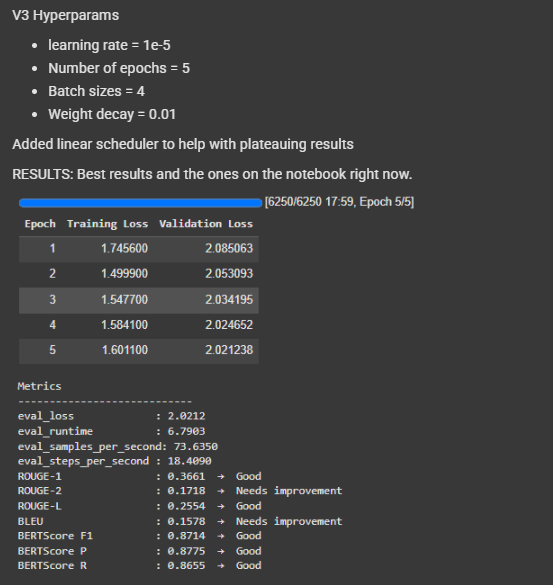


## **Experimental Setup**
<!-- Describe the datasets used for your experiments. List the machine learning techniques used to solve your problem and report the corresponding hyperparameters.

In this section, you can add **text**, **tables**, and **figures**. -->
For the dataset, we mentioned previously that we used a subset of the CNN/DailyMail dataset, a widely-used dataset in text summarization. The dataset contains news articles with objective summaries also called highlights. Since the original dataset is very large, we randomly selected 6.5k samples for the project to make the fine-tuning process manageable and time-efficient. These 6.5k samples were then passed through ChatGPT to transform the objective summaries into emotional ones.

For the emotional summaries generation, we focused on fine-tuning two powerful pretrained transformer models, PEGASUS and T5-base. Both models are based on the encoder-decoder architecture,which has bee proven to be good with summarization. After every iteration, the models were evaluated with the metrics seen above as well as by observing the loss progress at every epoch. Wiht this data, we were able to determine if it was overfitting or underfitting, if we were reaching a loss plateau and what to do to possibly fix it, etc. The metrics were able to let us catch any issues, while still being realistic with our ressources. For example, it is certain that more data would have help, especially more higher quality data, but we did not have access to that and hyper parameter tuning helped a lot.

## **Experimental Results**
<!-- Describe here the main experimental results. Critically discuss them. Compare them with results available in the literature (if applicable).

In this section, you can add **text** and **figures**, **tables**, **plots**, and code. Make sure the code is runnable and replicable. -->

The main results can be seen in sections 2.2 and 3 of the notebook.

All trained models produced non objective summaries. However, they did not all provide quality summaries. As an example, we have a snapshot of the summaries provided with the T5 model.

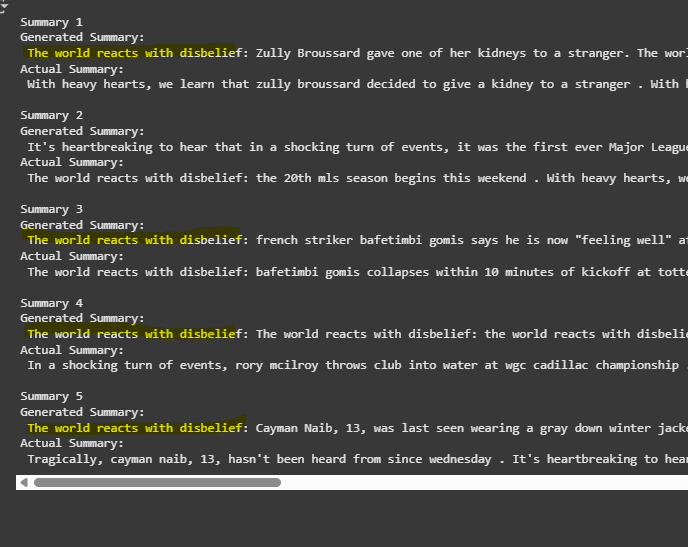

They seem to be coherent enough but they repeat a lot of the same emotion key words. Sometimes, no matter the emotion, they use a negative connotation set of words. It is interesting because the model knows that by adding emotionally loaded words there, its going to chnage the tone of the summary, however, it is clear that even if it is semi coherent, the model does not understand what the words actually mean.

It is clear from the data gotten from the T5 model that it is struggling with summarization of this nature, and it is normal because it is not a model made solely for that purpose.

If we look at the results previously seen for the PEGASUS model, there is a better understanding of the summarization and it is reflecte through the metric scores. It is also not perfect but even reading it ourselves, it makes more sense. On of the things we could've improved on would have been to either produce more concise summaries or allow for longer ones since a few seem to be cut short.

## **Conclusions**

<!-- Summarize what you could and could not conclude based on your experiments.
In this section, you can add **text**. -->

With this project, we were able to conclude that it is possible to generate emotional summaries. However, during the research part, we discovered that there is a lack of data to develop models capable of doing this. Most of the models trained were able to generate summaries with some sort of emotion, but it did not always make sense and there was a lot of repetition. This could also be attributed to the fact that the data wasn't all good. After further inspection, some data entries werent modified correctly. Therefore we can conclude that this is possible but there are a lot of things we could do better.

We had to partially freeze the PEGASUS model due to resrouces. If we were to train the full model, we would get better results but we were not abke to prove that. The biggest improvement we could do is to create and ensure that there is a big enough, well written dataset for the task. Chat gpt was a powerful tool for this task, but it wasnt perfect and it considered most of the news as negatuvely connotated.

In conclusion, we should create a better dataset and try training with more resources.

## **References**
<!-- You can add here the citations of books, websites, or academic papers, etc. -->

LINK TO REPO CONTAINING DATA AND NOTEBOOK WITH CODE: https://github.com/camilavejar/COMP432-Machine-Learning-Project-Emotional-Summaries

Other Resources:

PEGASUS documentation:

https://arxiv.org/pdf/1912.08777

https://huggingface.co/docs/transformers/model_doc/pegasus

Dataset:

https://paperswithcode.com/dataset/cnn-daily-mail-1

Trandformers library:

https://huggingface.co/docs/transformers/en/index

Metrics:

https://en.wikipedia.org/wiki/ROUGE_(metric)


https://en.wikipedia.org/wiki/BLEU

https://huggingface.co/spaces/evaluate-metric/bertscore
